In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob

In [2]:
eval_file_list=glob.glob('evaluation_*')

In [3]:
massaap_eval_file=glob.glob('evaluation_massaap')[0]
massaap_eval_df = pd.read_csv(massaap_eval_file,sep=' ')
massaap_target_name = massaap_eval_df['targetname']
massaap_noise_floor = massaap_eval_df['noise_floor']

massaap_eval_dict = {}
for index, each in enumerate(massaap_target_name):
    EPIC = each.split('/')[-1][4:13]
    massaap_eval_dict[EPIC]=massaap_noise_floor[index]

In [4]:
massaap_eval_df = pd.read_csv(massaap_eval_file,sep=' ')


eval_dict = {}
for index, each in enumerate(massaap_target_name):
    EPIC = each.split('/')[-1][4:13]
    eval_dict[EPIC]=massaap_noise_floor[index]

In [5]:
magdf = pd.read_csv('kp_mag_search.csv')
magdf_epic = np.asarray(magdf['EPIC'].tolist()[1:])
magdf_kepmag = np.asarray(magdf['KepMag'].tolist()[1:])
magdf_dict = {}
for index, each in enumerate(magdf_epic):
    magdf_dict[each]=magdf_kepmag[index]

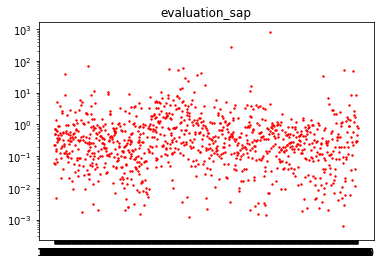

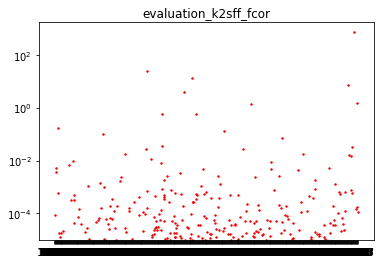

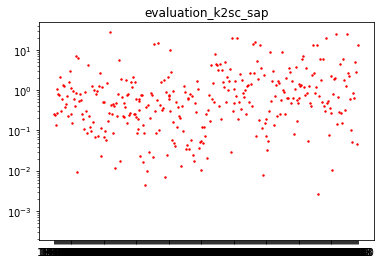

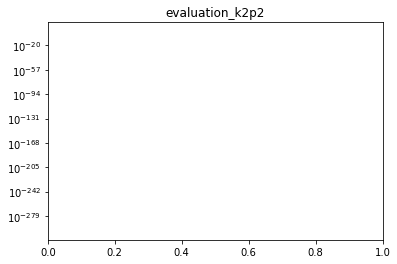

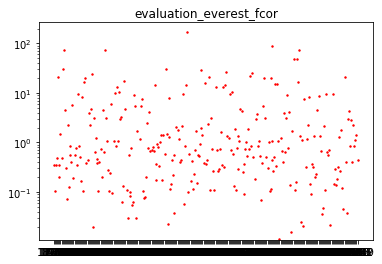

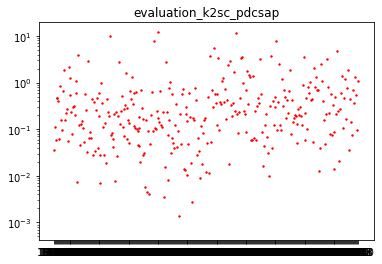

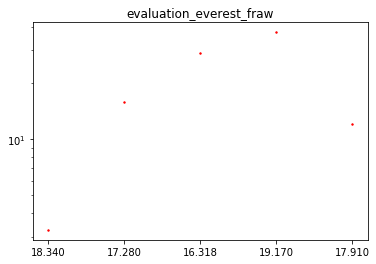

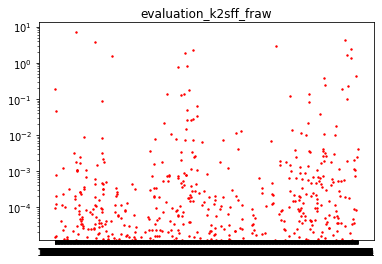

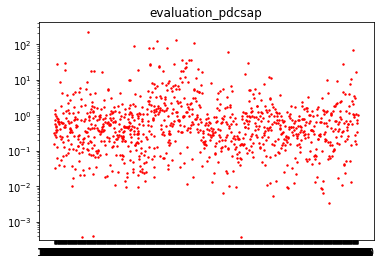

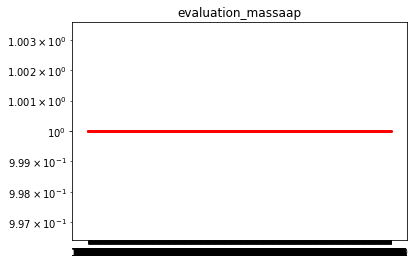

In [6]:
for index, eachevalfile in enumerate(eval_file_list):
    #if index < 3:
    if True:
        df = pd.read_csv(eachevalfile,sep=' ')
        target_name=df['targetname']
        noise_floor=df['noise_floor']
        
        target_name = target_name.tolist()
        noise_floor = noise_floor.tolist()
        
        eval_dict = {}
        for index, each in enumerate(target_name):
            EPIC = each.split('/')[-1][4:13]
            eval_dict[EPIC]=noise_floor[index]
            
        plt.figure()
        for index, each in enumerate(eval_dict.keys()):
            try:
                if eval_dict[each]<10000:
                    plt.scatter(magdf_dict[each],eval_dict[each] / massaap_eval_dict[each],c='r',s=2)
            except KeyError:
                pass
        plt.yscale('log')
        plt.title(eachevalfile)
        plt.show()